In [1]:
%matplotlib notebook
%reset -f

# AUV Surge Sub-model Estimation

### System Description

As an illustrative example, we will substitute our surge sub-model with a simple 1-DOF mass-spring-damper system.

![msd_system](mass_spring_damper.png "Mass-Spring-Damper System")

The equations of motion can be written:

$$
\sum F_x = F(t) - b \dot{x} - kx = m \ddot{x}
$$

where $x$ is the displacement, $m$ is the mass, $k$ is the spring constant, $b$ is the damping constant and $F$ is the input force, expressed here as a function of time. Reframing the system in state-space form, using the state vector:

$$
\mathbf{x} = \begin{bmatrix} x \\\ \dot{x} \end{bmatrix}
$$

the equations are written:

$$
m \mathbf{\dot{x}} = \begin{bmatrix} \dot{x} \\\ \ddot{x} \end{bmatrix} = \begin{bmatrix} 0 & m \\\ -k & -b \end{bmatrix} \begin{bmatrix} x \\\ \dot{x} \end{bmatrix} + \begin{bmatrix} 0 \\\ 1 \end{bmatrix} F(t)
$$

### Dynamic Response Simulation 

<IPython.core.display.Javascript object>


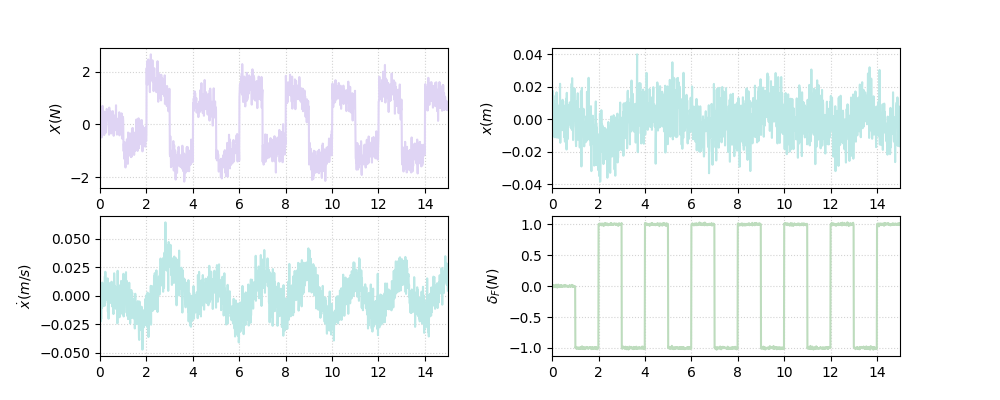

In [2]:
%run -i sim.py

### Nonlinear (iterative) Gradient-based Estimation

For comparison, we will employ a Gradient-based technique to minimise the residual and estimate the coefficients. First, we try Powell's Method, which operates on a scalar cost.

In [3]:
OPTFUN = 'optimize' # ['optimize', 'lmfit']
MAXFUN = 100
PLOT_ESTIM = True
fig = None

<IPython.core.display.Javascript object>


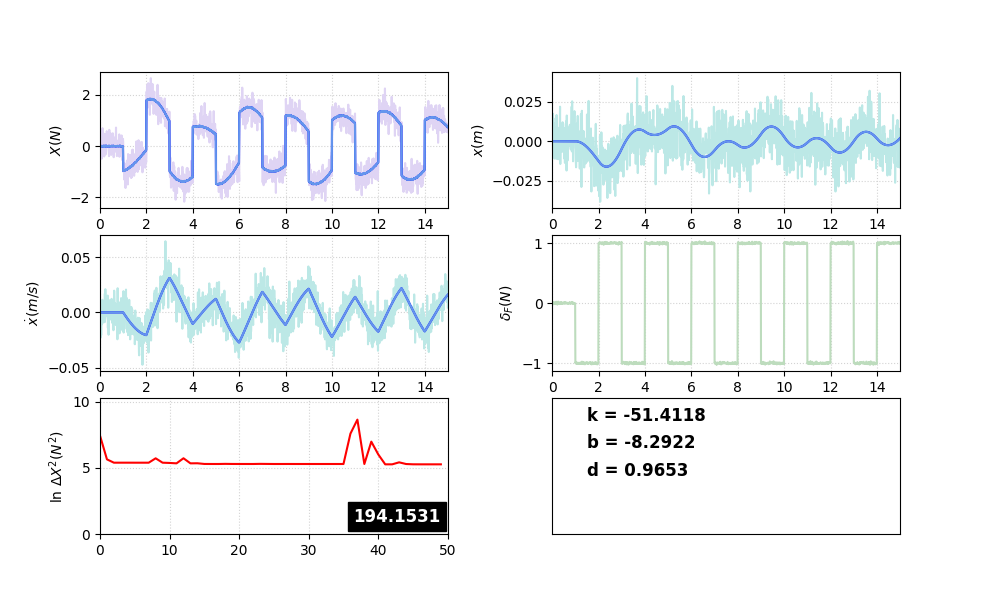

POWELL'S MINIMIZATION:
Time elapsed: 16.363025 seconds

            TRUE      F_EST
k    :   -50.0000   -51.4118
b    :   -10.0000    -8.2922
d    :     1.0000     0.9647


In [4]:
%run -i estim.py

### Levenberg-Marquardt Optimisation

Next, we utilise Levenberg-Marquardt, which operates on a full state vector cost function, which is much more efficient for state-space/multi-dimensional models.

In [5]:
OPTFUN = 'lmfit' # ['optimize', 'lmfit']
PLOT_ESTIM = True
fig = None

<IPython.core.display.Javascript object>


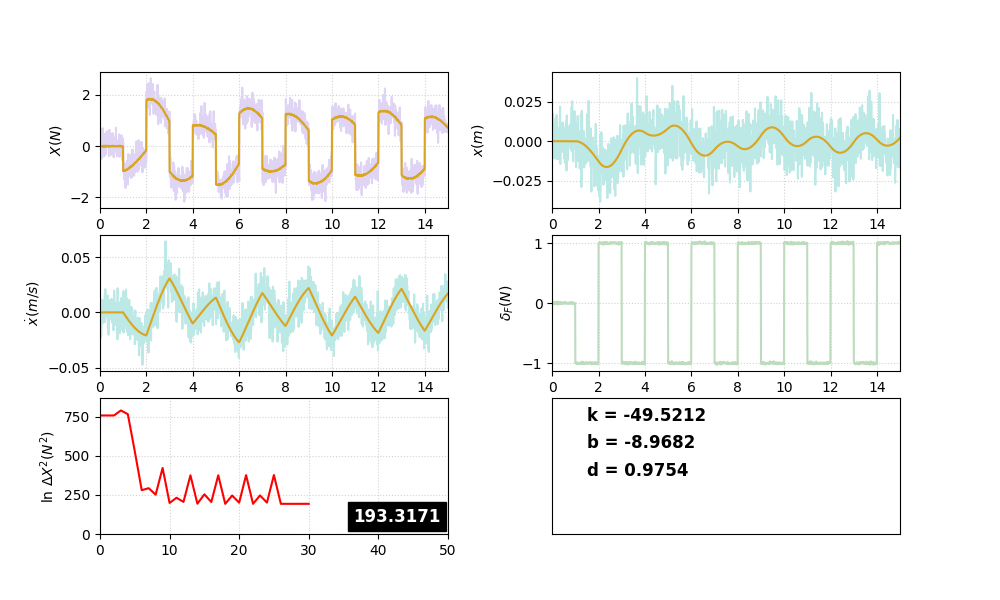

LEVENBERG-MARQUARDT OPTIMIZATION:
Time elapsed: 4.535466 seconds

            TRUE      F_EST
k    :   -50.0000   -49.5212
b    :   -10.0000    -8.9682
d    :     1.0000     0.9754


In [6]:
%run -i estim.py

### Bayesian Estimation

Last, we're going to try to fit our model using Markov-Chain Monte Carlo (MCMC).

In [7]:
# Number of samples for chain-0 (initial estimation) and chain-1 (training)
NUM_SAMPLES = [ 300, 300 ]
PLOT_MCMC = True
fig = None

 BUILDING PROBABILITY DISTRIBUTION MODEL 



<IPython.core.display.Javascript object>


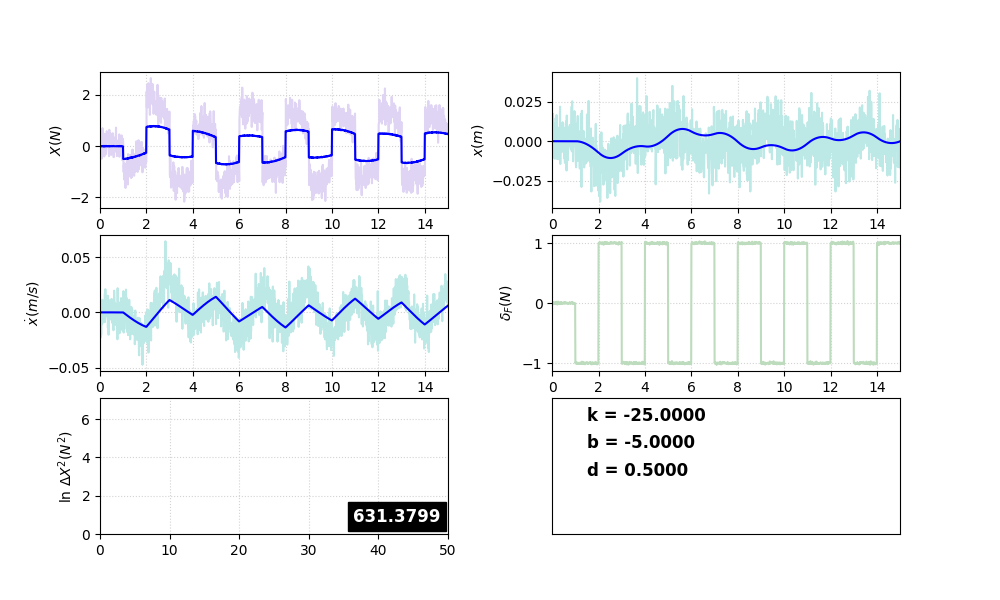

 BAYES ESTIMATE (MARKOV CHAIN MONTE CARLO): 
 Switch PLOT_MCMC to False for this... 

 Chain 0: 
 [-----------------100%-----------------] 300 of 300 complete in 5.3 sec
 Chain 1: 
 [-----------------100%-----------------] 301 of 300 complete in 5.6 sec
Time elapsed: 00h 00m 10s
            TRUE      B_EST
k    :   -50.0000   -50.4257
b    :   -10.0000   -10.8344
d    :     1.0000     1.0213


In [8]:
%run -i bms.py

<IPython.core.display.Javascript object>


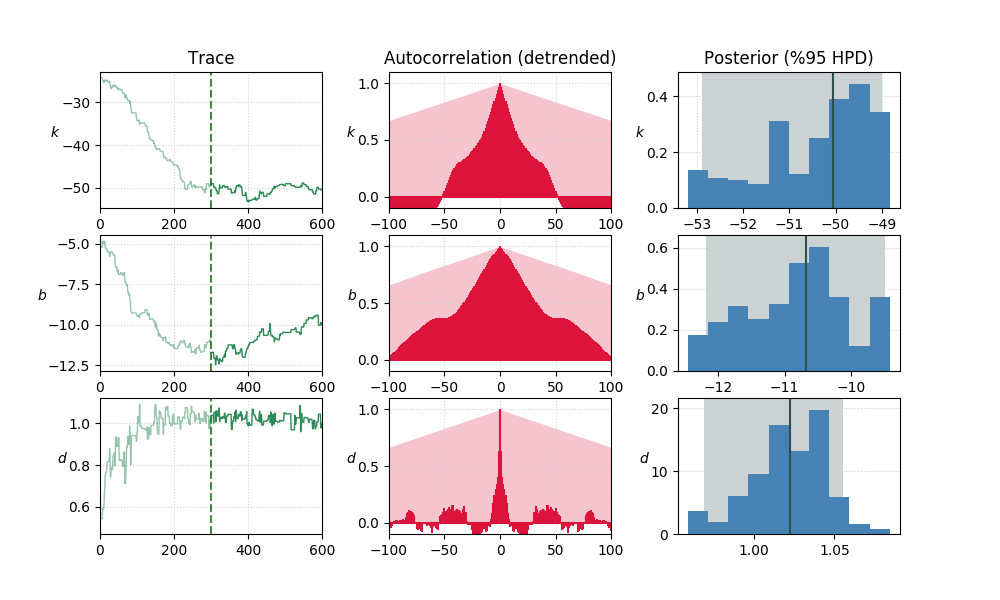

In [9]:
%run -i bmsplot.py

### Starting with Improved Initial Estimates

We can do better by starting with a more accurate initial estimate, based on the Levenberg-Marquardt results, and running more samples.

In [10]:
# Number of samples for chain-0 (initial estimation) and chain-1 (training)
NUM_SAMPLES = [ 5000 ]
DO_PYMC_MCMC = True
PLOT_MCMC = False
fig = None
C0 = C_LM

In [11]:
%run -i bms_model.py
%run -i bms.py

 BUILDING PROBABILITY DISTRIBUTION MODEL 

 BAYES ESTIMATE (MARKOV CHAIN MONTE CARLO): 

 Chain 0: 
 [-----------------100%-----------------] 5000 of 5000 complete in 83.1 sec
Time elapsed: 00h 01m 23s
            TRUE      B_EST
k    :   -50.0000   -50.5172
b    :   -10.0000   -11.0987
d    :     1.0000     1.0225


<IPython.core.display.Javascript object>


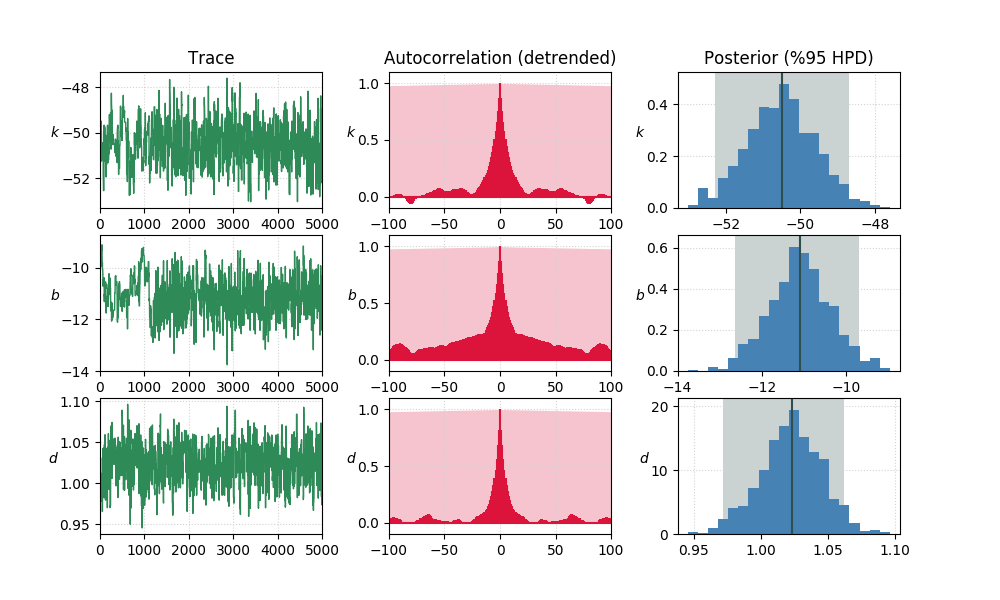

In [12]:
%run -i bmsplot.py